## করণীয় ইভ্যালুয়েশন প্রসেস: ট্রেইন/টেস্ট ভাগ 
জুপিটার নোটবুকের লিংক https://github.com/raqueeb/ml-python/blob/master/model-evaluation2.ipynb

ডাউনলোড করে নিন নিজের ব্যবহারের জন্য, ধারণার জন্য ধন্যবাদ কেভিন মার্কামকে। ডেটাস্কুল। 

"মডেল ইভাল্যুয়েশনের ধারণা" চ্যাপ্টারের দ্বিতীয় প্রস্তাবনা দেখুন। 

১. পুরো ডেটাসেটকে ভাগ করে ফেলি দুভাগে। ক. ট্রেনিং সেট খ. টেস্ট সেট।

২. মডেলকে ট্রেনিং করাবো "ট্রেনিং সেট" দিয়ে। 

৩. মডেলকে টেস্ট করবো "টেস্ট সেট" দিয়ে। সেটাই ইভ্যালুয়েট করবে কেমন করছে মডেলটা। 

৪. আমাদের সাইকিট-লার্নে এই কাজ করার জন্য train_test_split নামে একটা ফাংশন তৈরি করে দেয়া হয়েছে কাজের সুবিধার্থে। শুধুমাত্র কনভেনশনটা জানলেই চলবে। 

আইরিস ডেটাসেট নিয়ে কাজ করার আগে একটা উদাহরণ দেখি। সাইকিট লার্ন ডকুমেন্টেশন থেকে নেয়া। আগে আপনাদেরকে দেখিয়ে নিয়ে আসি X এবং y এর ভেতরে কী আছে? 

In [1]:
import numpy as np
# ভুলেও বোঝার দরকার নেই কিভাবে আমরা X, y জেনারেট করলাম 
X, y = np.arange(10).reshape((5, 2)), range(5)
# আমাদের দেখতে হবে কি আছে X এর ভেতরে?
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [2]:
# এখন দেখি কি আছে y এর ভেতর। 
y

range(0, 5)

In [3]:
# এর মানে ০ থেকে ৫টা সংখ্যা, লিস্ট কমান্ড দিয়ে দেখি বরং 
list(y)

[0, 1, 2, 3, 4]

এখন আসি কাজের কাজে। কষ্ট করে X, y ম্যানুয়ালি আলাদা না করে ডেকে নিয়ে আসি train_test_split ফাংশনকে। সাইকিট লার্নের model_selection মডিউল থেকে। আমি যদি আলাদা করে কিছু না বলি, তাহলে সে আমাদের এই ৫ লাইনের ডেটাকে ৭৫% ট্রেনিং আর ২৫% টেস্ট ডেটাসেটে ভাগ করবে।  

In [4]:
from sklearn.model_selection import train_test_split

একটু ভালো করে লক্ষ্য করলেই দেখবেন নিচের কমান্ডটা একটা সাইকিট লার্ন কনভেনশন। এই স্টাইলে ফলো করে সবাই। এটাই ব্যবহার করবো আমরা। শুরুতে কপি করে চালাবো এই কনভেনশন। train_test_split পুরো ডেটাকে ট্রেনিং আর টেস্ট সেটে ভাগ করার আগে দৈবচয়নের মাধ্যমে (random_state) শাফল করে নেয় কাজের সুবিধার্থে। মনে আছে শুরুতে টার্গেট ভেক্টর 0,0,0 এর পর 1,1,1 অথবা 2,2,2 হওয়ার কারণে শাফল জরুরি। তবে, random_state=? ভ্যালু হিসেবে যা ব্যবহার করবেন সেটাকে এক রাখতে হবে পুরো এক্সারসাইজে। মনে রাখুন X ভাগ হবে X_train, X_test দুভাগে। সেখানে y হবে y_train, y_test দুভাগে। 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

চলুন দেখি X_train, X_test, y_train এবং y_test মধ্যে কী আছে? খেয়াল করুন কিভাবে পুরো ডেটাসেট ভাগ হয়েছে?

In [6]:
# ৫টা রেকর্ডের মধ্যে ৩টা এসেছে এখানে 
X_train

array([[2, 3],
       [8, 9],
       [4, 5]])

In [7]:
# টার্গেট ভেক্টর আসতে হবে ওই ৩টাই 
y_train

[1, 4, 2]

In [8]:
X_test

array([[0, 1],
       [6, 7]])

In [9]:
y_test

[0, 3]

In [10]:
train_test_split(y, shuffle=False)

[[0, 1, 2], [3, 4]]

দেখেছেন তো কিভাবে পুরো ডেটাসেট ভাগ হয়ে গেছে? এখন আসি আইরিস ডেটাসেটে। শুরুতে আগের গল্প। পপুলেট করে নেই ফিচার আর টার্গেট রেসপন্স। 

### ধাপ ১

In [11]:
# শুরুতে লোড করে নেই আইরিস ডেটাসেট 
from sklearn.datasets import load_iris
iris = load_iris()

# ফিচার আর টার্গেট রেসপন্স চলে যাচ্ছে X এবং y
X = iris.data
y = iris.target

In [12]:
# train_test_split চালানোর আগে অ্যারেগুলোর সংখ্যা দেখে রাখি 
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### ধাপ ২

In [13]:
# ইমপোর্ট করছি train_test_split ফাংশনকে 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

এই জিনিস থেকে কী পাবো আমরা?

১. আলাদা আলাদা ডেটা দিয়ে মডেলকে ট্রেইন এবং টেস্ট করানো যাবে।

২. টেস্ট সেটের 'রেসপন্স ভ্যালু' আমরা যেহেতু জানি, সেজন্য সেটার পারফরম্যান্স জানা যাবে। 

৩. টেস্টিং অ্যাক্যুরেসি ভালো হবে যখন দুটো আলাদা আলাদা ডেটাসেট। মডেলটা 'জেনারেলাইজড' হলো নতুন আউট অফ স্যাম্পল ডেটা নিয়ে কাজ করার জন্য।

৪. ডিফল্ট সেটিংস ধরে রেকর্ডকে ভাগ করে ৭৫% ডেটাকে ট্রেনিং আর ২৫% ডেটাকে টেস্ট ডেটাসেটে ভাগ হয়ে যাবে। ৭৫% হচ্ছে ১১২টা রেকর্ড। ২৫% হচ্ছে ৩৮টা রেকর্ড।

In [14]:
# নতুন  X অবজেক্টগুলোর রেকর্ড সংখ্যা 
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [15]:
# নতুন  y অবজেক্টগুলোর রেকর্ড সংখ্যা 
print(y_train.shape)
print(y_test.shape)

(112,)
(38,)


ধরুন, আপনার বন্ধু নাছোড়বান্দা। সে ডিফল্ট সেটিংস নিয়ে সন্তুষ্ট নয়। তার কথা হচ্ছে ট্রেনিং আর টেস্ট সেট ভাগ করতে চায় ৬০-৪০% ভাগে। তার জন্য আপনাকে যোগ করতে হবে test_size=0.4 মানে ৪০%। 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

দেখে নেই নতুন ভাগ। 

In [17]:
# নতুন  X অবজেক্টগুলোর রেকর্ড সংখ্যা 
print(X_test.shape)
print(y_test.shape)

(60, 4)
(60,)


### ধাপ ৩

In [18]:
# আগের মতো KNeighborsClassifier ইমপোর্ট করি 
from sklearn.neighbors import KNeighborsClassifier
# মডেলকে ইনস্ট্যানশিয়েট করলাম 
# যদি "কে-নিয়ারেস্ট নেইবার্স" ক্লাসিফায়ারের নেইবার ৩ হয়
knn = KNeighborsClassifier(n_neighbors=3)
# মডেলের মধ্যে সম্পৰ্ক তৈরি করি X_train এবং y_train দিয়ে
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### ধাপ ৪

In [19]:
# প্রেডিকশন করছি টেস্ট সেট ধরে 
y_pred = knn.predict(X_test)
# প্রেডিক্টেড রেসপন্স ভ্যালুর (y_pred) সাথে তুলনা করছি 
# আসল রেসপন্স ভ্যালু (y_test)কে 
# আগের মতো ইমপোর্ট করলাম metricsকে 
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


### যদি "কে-নিয়ারেস্ট নেইবার্স" ক্লাসিফায়ারের নেইবার ৫ হয়

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


নেইবারের সংখ্যা ৩ থেকে ৫ করার পর অ্যাক্যুরেসি 0.95 থেকে 0.96 হয়েছে। এখন নেইবারের সংখ্যা বার বার পাল্টে দেখা যেতে পারে কোথায় তার অ্যাক্যুরেসি সবচেয়ে বেশি। ম্যানুয়ালি না করে ফেলে দেই প্রোগ্রামিং লুপে। সেই বের করে দেবে কোথায় অ্যাক্যুরেসি ভালো। 

In [21]:
# আমরা K=1 থেকে K=25 লুপ চালিয়ে সেটাকে রেকর্ড করি 
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

ম্যানুয়ালি না দেখে k_range এবং scoresকে x, y এক্সিসে প্লট করি। ভিজ্যুয়ালাইজেশন ইজ দ্য কিং!

Text(0,0.5,'Testing Accuracy')

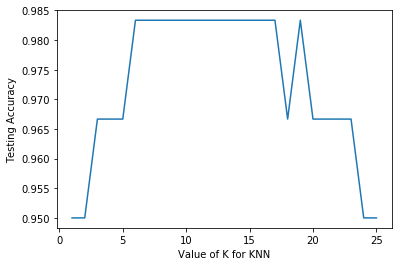

In [22]:
# Matplotlibকে ইমপোর্ট করে নিয়ে আসি (আমাদের সাইন্টিফিক প্লটিং লাইব্রেরি)
import matplotlib.pyplot as plt

# আমাদের জুপিটার নোটবুকে ইনলাইনে দেখানোর জন্য 
%matplotlib inline

# আমরা K এবং "testing accuracy" এর সম্পর্ক প্লট করছি 
plt.plot(k_range, scores)
# লেবেলের জন্য 
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [23]:
# এখানে দেখছি ৭ থেকে ১৭ পর্যন্ত অ্যাক্যুরেসি ভালো, টেস্ট করছি ১০ দিয়ে 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.983333333333


**কী বুঝলাম এখানে?**

১. "কে-নিয়ারেস্ট নেইবার্স" মডেলের কমপ্লেক্সিটি নির্ভর করছে K এর ভ্যালুর ওপর। ভ্যালু কম হলে কমপ্লেক্সিটি বেশি। 

২. মডেলের ট্রেনিং অ্যাক্যুরেসি বাড়ে মডেলের কমপ্লেক্সিটি বাড়লে। 

৩. টেস্টিং অ্যাক্যুরেসি পেনাল্টি করে মডেল খুব বেশি কমপ্লেক্সিটি অথবা খুব সহজ হয়ে গেলে। 

## কেমন হয় ১৫০ রেকর্ড ডেটাসেটের বাইরের স্যাম্পল দিয়ে প্রেডিক্ট করলে?

In [24]:
# নেইবার্স ১০ ধরলাম 
knn = KNeighborsClassifier(n_neighbors=10)

# মডেলকে ট্রেইন করতে হবে X এবং y দিয়ে (X_train, y_train নয়)
knn.fit(X, y)

# প্রেডিক্ট করি নতুন স্যাম্পল দিয়ে 
knn.predict([[3, 5, 4, 2]])

array([1])

অথবা, যদি সরাসরি জানতে চাই আইরিস প্রজাতির নামটা?

In [25]:
print("Predicted target name:",
       iris['target_names'][knn.predict([[3, 5, 4, 2]])])

Predicted target name: ['versicolor']
